Conf number: 0, beta: 0
Conf number: 1, beta: 0
Conf number: 2, beta: 0
Conf number: 3, beta: 0
Conf number: 4, beta: 0
Conf number: 5, beta: 0
Conf number: 6, beta: 0
Conf number: 7, beta: 0
Conf number: 8, beta: 0
Conf number: 9, beta: 0
Conf number: 10, beta: 0
Conf number: 11, beta: 0
Conf number: 12, beta: 0
Conf number: 13, beta: 0
Conf number: 14, beta: 0
Conf number: 15, beta: 0
Conf number: 16, beta: 0
Conf number: 17, beta: 0
Conf number: 18, beta: 0
Conf number: 19, beta: 0
Conf number: 20, beta: 0
Conf number: 21, beta: 0
Conf number: 22, beta: 0
Conf number: 23, beta: 0
Conf number: 24, beta: 0
Conf number: 25, beta: 0
Conf number: 26, beta: 0
Conf number: 27, beta: 0
Conf number: 28, beta: 0
Conf number: 29, beta: 0
Conf number: 30, beta: 0
Conf number: 31, beta: 0
Conf number: 32, beta: 0
Conf number: 33, beta: 0
Conf number: 34, beta: 0
Conf number: 35, beta: 0
Conf number: 36, beta: 0
Conf number: 37, beta: 0
Conf number: 38, beta: 0
Conf number: 39, beta: 0
Conf numbe

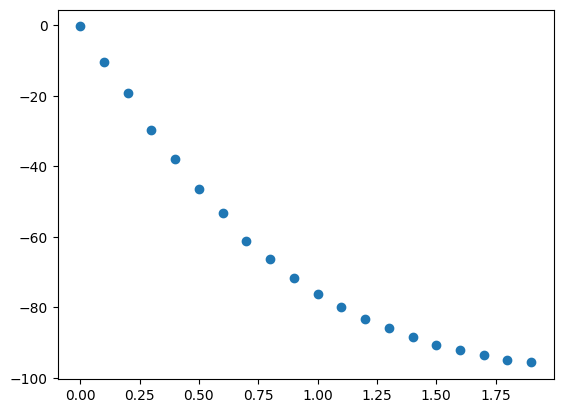

In [4]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# parameters
conf_n = 1000
mc_sweep = 10000
dim = 1
num = 100

subprocess.run(["g++", "-o", "main", "ND_ising_model.cpp", "ND_ising_system.cpp"], check=True)

df_full = pd.DataFrame({"beta": [], "energies": [], "mags": []})

beta_values = []
energy_values = []
mag_values = []

for b in range(0, 20):
    subprocess.run(["./main", str(num), str(dim), str(mc_sweep), str(conf_n), str(b * 0.1)], check=True)
    df = pd.read_csv("output.csv")

    beta_values.append(b * 0.1)
    energy_values.append(df["energy_total"].values.tolist())  # Convert to list
    mag_values.append(df["magnetisation"].values.tolist())  # Convert to list

df_full["beta"] = beta_values
df_full["energies"] = energy_values
df_full["mags"] = mag_values

plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["energies"]])
plt.savefig("energy_v_beta.png")

In [16]:
subprocess.run(["g++", "-o", "sweep", "ND_sweep.cpp", "ND_ising_system.cpp"], check=True)
subprocess.run(["./sweep", "100", "1", "0.5", "100000"], check=True)

Initialising System...
Sweeps Recorded.


CompletedProcess(args=['./sweep', '100', '1', '0.5', '100000'], returncode=0)

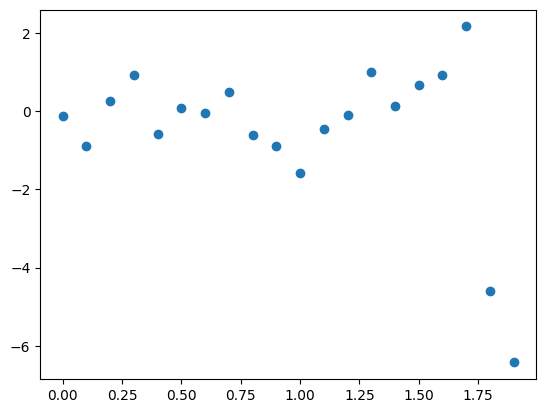

In [55]:
plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["mags"]])
plt.savefig("magnet_v_beta.png")

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


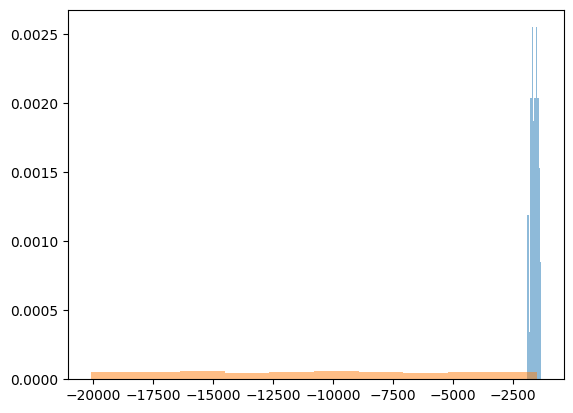

In [57]:
for i in range(0, 10):
    plt.hist(df_full[df_full["beta"] == i]["energies"], alpha=0.5, density=True, bins=10)